# NEON Data

This project utilizes data from the National Ecological Observatory Network (NEON). This group has partitiioned the continental United States, Hawaii, and Puerto Rico into 20 distince Ecoclimatic Domains to capture the full range of U.S. ecological and climatic diversity. Across these 20 Ecoclimatic Domains, there are 81 field sites which include 47 terrestrial sites and 34 freshwater aquatic sites. In this project, we utilize the data from the 47 terrestrial sites.

![NEONScreenshot](https://www.neonscience.org/sites/default/files/styles/max_1300x1300/public/2021-04/2021_04_Graphic_Domain_Map%20Field%20sites_w_rivers_png.png?itok=0_oMxQB8)
    
Each terrestrial site contains a micrometeorological tower which collects weather and climate data with a series of automated sensors. Micrometeorological towers are positioned to maximize the data captured at an individual site which means the height and number of levers in a tower varies across feild sites. Additionally, NEON provides metadata for every field site which includes information about the site's location, elevation, climate, dominant NLCD classes, and tower other information. This information can be found on NEON'S website.

Every terrestrial site came with a set of h5 files which included a single h5 file for every month that data was collected at the site. For the purposes of this project, before working with this data, it was calibrated and compressed into npz files. All of the h5 files for each of the 47 terrestrial sites were calibrated then compressed into two npz files for each site. The process of calibrating and compressing this data is outlined below.

## Data Calibration and Compression

NEON calibrates isotopic analyzers only once a year. Thie means observations are not calibrated to remove instrumental drift or valriation in base calibration. In order to further calibrate this data, the gain-and-offset calibration method outlined in ["Calibration Strategies for Detecting Macroscale Patterns in NEON Atmospheric Carbon Isotope Obervations"](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2020JG005862) was implemented. The [GitHub repository](https://github.com/rfiorella/NEONiso) containing R scripts for this calibration technique were provided by authors. Read into the CalibrationAndCompression folder for more information on how data were calibrated and compressed for the available versions of the NEONiso code.

## Import Python Libraries

In [1]:
#pip install umap-learn

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
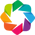

In [2]:
import os
import time
import requests
import warnings
import numpy as np
import pandas as pd
import holoviews as hv
import panel as pn
#import umap.umap_ as umap
import matplotlib.pyplot as plt

from glob import glob
from pathlib import Path
from holoviews.selection import link_selections
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import scale, StandardScaler

try:
    import cuml
    import cupy as cp
    HAS_GPU = True
except ImportError:
    HAS_GPU = False

# import s3fs
# s3 = s3fs.S3FileSystem(anon=False)
hv.extension('bokeh')
warnings.filterwarnings('ignore')
pn.extension(sizing_mode="stretch_width")

## Define Global Variables for Data Loading

In [3]:
logo_url = 'https://1000logos.net/wp-content/uploads/2017/03/NASA-Logo.png'
# data_dir = 's3://dh-dsg/aiml-stg-2022/mass-spec-neon/atmo_c02_calib_v5/9m'
data_dir = '/home/jovyan/efs/STG_Tutorial_Data/PlanetaryScience_CNN/9m'
data_suffix = '_09m.npz'

dim_reduction_options = {
    "PCA": "PCA",
    "SVD": "SVD",
    "UMAP": "UMAP"
}

## Define Variables of Interest (SME knowledge about the data)

In [4]:
# priority paremeters to look at and analyze
interesting_params = [
    "date",
    "press mean",
    "pressEnvHut mean",
    "rhEnvHut_5 mean",
    "rtioMoleDry12CCo2 mean",
    "rtioMoleDry13CCo2 mean",
    "rtioMoleDryCo2 mean",
    "rtioMoleDryH2o mean",
    "rtioMoleWet12CCo2 mean",
    "rtioMoleWet12CCo3 mean",
    "rtioMoleWet12Co2 mean",
    "rtioMoleWetH2o mean",
    "rtioMoleWetH2oEnvHut mean",
    "temp mean",
    "tempEnvHut mean",
    "dlta13CCo2 mean",
    "dlta13CCo2 min",
    "dlta13CCo2 max"
]

# parameters are set to accomodate for the datatable header titles
params  = [
    "date",
    "s-time",
    "level",
    "press mean",
    "press min",
    "press max",
    "press variance",
    "press numsamp",
    "pressEnvHut mean",
    "pressEnvHut min",
    "pressEnvHut max",
    "pressEnvHut variance",
    "pressEnvHut numsamp",
    "rhEnvHut_5 mean",
    "rhEnvHut_5 min",
    "rhEnvHut_5 max",
    "rhEnvHut_5 variance",
    "rhEnvHut_5 numsamp",
    "rtioMoleDry12CCo2 mean",
    "rtioMoleDry12CCo2 min",
    "rtioMoleDry12CCo2 max",
    "rtioMoleDry12CCo2 variance",
    "rtioMoleDry12CCo2 numsamp",
    "rtioMoleDry13CCo2 mean",
    "rtioMoleDry13CCo2 min",
    "rtioMoleDry13CCo2  max",
    "rtioMoleDry13CCo2  variance",
    "rtioMoleDry13CCo2 numsamp",
    "rtioMoleDryCo2 mean",
    "rtioMoleDryCo2 min",
    "rtioMoleDryCo2 max",
    "rtioMoleDryCo2 variance",
    "rtioMoleDryCo2 numsamp",
    "rtioMoleDryH2o mean",
    "rtioMoleDryH2o min",
    "rtioMoleDryH2o max",
    "rtioMoleDryH2o variance",
    "rtioMoleDryH2o numsamp",
    "rtioMoleWet12CCo2 mean",
    "rtioMoleWet12CCo2 min",
    "rtioMoleWet12CCo2 max",
    "rtioMoleWet12CCo2 variance",
    "rtioMoleWet12CCo2 numsamp",
    "rtioMoleWet12CCo3 mean",
    "rtioMoleWet12CCo3 min",
    "rtioMoleWet12CCo3 max",
    "rtioMoleWet12CCo3 variance",
    "rtioMoleWet12CCo3 numsamp",
    "rtioMoleWet12Co2 mean",
    "rtioMoleWet12Co2 min",
    "rtioMoleWet12Co2 max",
    "rtioMoleWet12Co2 variance",
    "rtioMoleWet12Co2 numsamp",
    "rtioMoleWetH2o mean",
    "rtioMoleWetH2o min",
    "rtioMoleWetH2o max",
    "rtioMoleWetH2o variance",
    "rtioMoleWetH2o numsamp",
    "rtioMoleWetH2oEnvHut mean",
    "rtioMoleWetH2oEnvHut min",
    "rtioMoleWetH2oEnvHut max",
    "rtioMoleWetH2oEnvHut variance",
    "rtioMoleWetH2oEnvHut numsamp",
    "temp mean",
    "temp min",
    "temp max",
    "temp variance",
    "temp numsamp",
    "tempEnvHut mean",
    "tempEnvHut min",
    "tempEnvHut max",
    "tempEnvHut variance",
    "tempEnvHut numsamp",
    "dlta13CCo2 variance",
    "dlta13CCo2 numsamp",
    "dlta13CCo2 mean",
    "dlta13CCo2 min",
    "dlta13CCo2 max"
]

columns1 = [
    "date",
    "s-time",
    "level",
    "press mean",
    "press min",
    "press max",
    "press variance",
    "press numsamp",
    "pressEnvHut mean",
    "pressEnvHut min",
    "pressEnvHut max",
    "pressEnvHut variance",
    "pressEnvHut numsamp",
    "rhEnvHut_5 mean",
    "rhEnvHut_5 min",
    "rhEnvHut_5 max",
    "rhEnvHut_5 variance",
    "rhEnvHut_5 numsamp",
    "rtioMoleDry12CCo2 mean",
    "rtioMoleDry12CCo2 min",
    "rtioMoleDry12CCo2 max",
    "rtioMoleDry12CCo2 variance",
    "rtioMoleDry12CCo2 numsamp",
    "rtioMoleDry13CCo2 mean",
    "rtioMoleDry13CCo2 min",
    "rtioMoleDry13CCo2  max",
    "rtioMoleDry13CCo2  variance",
    "rtioMoleDry13CCo2 numsamp",
    "rtioMoleDryCo2 mean",
    "rtioMoleDryCo2 min",
    "rtioMoleDryCo2 max",
    "rtioMoleDryCo2 variance",
    "rtioMoleDryCo2 numsamp",
    "rtioMoleDryH2o mean",
    "rtioMoleDryH2o min",
    "rtioMoleDryH2o max",
    "rtioMoleDryH2o variance",
    "rtioMoleDryH2o numsamp",
    "rtioMoleWet12CCo2 mean",
    "rtioMoleWet12CCo2 min",
    "rtioMoleWet12CCo2 max",
    "rtioMoleWet12CCo2 variance",
    "rtioMoleWet12CCo2 numsamp",
    "rtioMoleWet12CCo3 mean",
    "rtioMoleWet12CCo3 min",
    "rtioMoleWet12CCo3 max",
    "rtioMoleWet12CCo3 variance",
    "rtioMoleWet12CCo3 numsamp",
    "rtioMoleWet12Co2 mean",
    "rtioMoleWet12Co2 min",
    "rtioMoleWet12Co2 max",
    "rtioMoleWet12Co2 variance",
    "rtioMoleWet12Co2 numsamp",
    "rtioMoleWetH2o mean",
    "rtioMoleWetH2o min",
    "rtioMoleWetH2o max",
    "rtioMoleWetH2o variance",
    "rtioMoleWetH2o numsamp",
    "rtioMoleWetH2oEnvHut mean",
    "rtioMoleWetH2oEnvHut min",
    "rtioMoleWetH2oEnvHut max",
    "rtioMoleWetH2oEnvHut variance",
    "rtioMoleWetH2oEnvHut numsamp",
    "temp mean",
    "temp min",
    "temp max",
    "temp variance",
    "temp numsamp",
    "tempEnvHut mean",
    "tempEnvHut min",
    "tempEnvHut max",
    "tempEnvHut variance",
    "tempEnvHut numsamp",
    "dlta13CCo2 variance",
    "dlta13CCo2 numsamp",
    "dlta13CCo2 mean",
    "dlta13CCo2 min",
    "dlta13CCo2 max"
]

columns2 = [
    "date",
    "s-time",
    "level",
    "press mean",
    "press min",
    "press max",
    "press variance",
    "press numsamp",
    "pressEnvHut mean",
    "pressEnvHut min",
    "pressEnvHut max",
    "pressEnvHut variance",
    "pressEnvHut numsamp",
    "rhEnvHut_5 mean",
    "rhEnvHut_5 min",
    "rhEnvHut_5 max",
    "rhEnvHut_5 variance",
    "rhEnvHut_5 numsamp",
    "rtioMoleDry12CCo2 mean",
    "rtioMoleDry12CCo2 min",
    "rtioMoleDry12CCo2 max",
    "rtioMoleDry12CCo2 variance",
    "rtioMoleDry12CCo2 numsamp",
    "rtioMoleDry13CCo2 mean",
    "rtioMoleDry13CCo2 min",
    "rtioMoleDry13CCo2  max",
    "rtioMoleDry13CCo2  variance",
    "rtioMoleDry13CCo2 numsamp",
    "rtioMoleDryCo2 mean",
    "rtioMoleDryCo2 min",
    "rtioMoleDryCo2 max",
    "rtioMoleDryCo2 variance",
    "rtioMoleDryCo2 numsamp",
    "rtioMoleDryH2o mean",
    "rtioMoleDryH2o min",
    "rtioMoleDryH2o max",
    "rtioMoleDryH2o variance",
    "rtioMoleDryH2o numsamp",
    "rtioMoleWet12CCo2 mean",
    "rtioMoleWet12CCo2 min",
    "rtioMoleWet12CCo2 max",
    "rtioMoleWet12CCo2 variance",
    "rtioMoleWet12CCo2 numsamp",
    "rtioMoleWet12CCo3 mean",
    "rtioMoleWet12CCo3 min",
    "rtioMoleWet12CCo3 max",
    "rtioMoleWet12CCo3 variance",
    "rtioMoleWet12CCo3 numsamp",
    "rtioMoleWet12Co2 mean",
    "rtioMoleWet12Co2 min",
    "rtioMoleWet12Co2 max",
    "rtioMoleWet12Co2 variance",
    "rtioMoleWet12Co2 numsamp",
    "rtioMoleWetH2o mean",
    "rtioMoleWetH2o min",
    "rtioMoleWetH2o max",
    "rtioMoleWetH2o variance",
    "rtioMoleWetH2o numsamp",
    "rtioMoleWetH2oEnvHut mean",
    "rtioMoleWetH2oEnvHut min",
    "rtioMoleWetH2oEnvHut max",
    "rtioMoleWetH2oEnvHut variance",
    "rtioMoleWetH2oEnvHut numsamp",
    "temp mean",
    "temp min",
    "temp max",
    "temp variance",
    "temp numsamp",
    "tempEnvHut mean",
    "tempEnvHut min",
    "tempEnvHut max",
    "tempEnvHut variance",
    "tempEnvHut numsamp",
    "dlta13CCo2 mean",
    "dlta13CCo2 min",
    "dlta13CCo2 max",
    "dlta13CCo2 variance",
    "dlta13CCo2 numsamp"
]

## Define Preprocessing and Data Loading Functions

In [5]:
def update_site_dropdown(data_dir: str, data_suffix: str = '_09m.npz'):
    """
    Dynamically allocate available sites dropdown menu.
    """
    # sites = sorted(s3.glob(os.path.join(data_dir, f'*{data_suffix}')))
    sites = sorted(glob(os.path.join(data_dir, f'*{data_suffix}')))
    dropdown_options = {}
    for site in sites:
        dropdown_options[os.path.basename(site).replace(data_suffix, '')] = site
    return dropdown_options

def load_data(site_value: str, calibration_value: int, reject_value: int, interesting_value: int):
    """
    Load dataframe with site options.
    """
    # load data from S3 bucket
    # npz = np.load(s3.open(os.path.join('s3://', site_value)))
    npz = np.load(site_value)

    # choose between calibrated and non-calibrated
    if calibration_value == 1:
        iso = pd.DataFrame(npz["isoco2"]).iloc[:, 5:]
    else:
        iso = pd.DataFrame(npz["isoco2"]).iloc[:, 2:7]

    # extract metadata and time units from dataframe
    meta = pd.DataFrame(npz["meta"])    
    times = pd.to_datetime(meta[0], unit='s')

    # concatenate datasets
    df = pd.concat([times, meta, iso], axis=1)
    df = df.dropna()

    # add columns names to the dataframe
    if calibration_value == 1:
        df.columns = columns1
    else:
        df.columns = columns2

    # define parameters, this option can be passed as a global variable
    params = df.columns

    # reject values based on radio menu
    if reject_value == 1:
        df = df[df["dlta13CCo2 mean"] < 0]

    # select interesting values based on radio menu
    if interesting_value == 1:
        df = df.loc[:, interesting_params]

    return df

def pca_calc(data_frame, time_value: int, components: int):
    """
    Calculate PCA.
    """
    data_frame = data_frame.loc[:, data_frame.columns != 'date']

    if time_value != 1:
        data_frame = data_frame.loc[:, data_frame.columns != 's-time']

    data_frame = StandardScaler().fit_transform(data_frame)
    pca = PCA(n_components=components)
    return pca.fit_transform(data_frame)

def svd_calc(data_frame, time_value, components):
    """
    Calculate SVD.
    """
    data_frame = data_frame.loc[:, data_frame.columns != 'date']

    if time_value != 1:
        data_frame = data_frame.loc[:, data_frame.columns != 's-time']

    data_frame = StandardScaler().fit_transform(data_frame)
    # Create and run an TSVD with one less than number of features
    tsvd = TruncatedSVD(n_components=components)
    return tsvd.fit_transform(data_frame)

def umap_calc(data_frame, time_value, components, min_dist=0.1, no_neighbors=30, random_seed=1337, gpu: bool = False):
    """
    Calculate UMAP. TODO - FIX with GPU
    """
    data_frame = data_frame.loc[:, data_frame.columns != 'date']

    if time_value != 1:
        data_frame = data_frame.loc[:, data_frame.columns != 's-time']
        
    if HAS_GPU:
        data_frame = cp.array(data_frame)
        mod = cuml.UMAP(
            random_state=random_seed,
            n_neighbors=no_neighbors,
            min_dist=min_dist,
            n_components=components,
            ).fit(data_frame)
        emb = mod.transform(data_frame)
        data_frame = cp.asnumpy(emb)
        # dump(emb, f"umaps/um_{random_seed}_{no_neighbors}_{min_dist}_{ts}.bin")
    #else:
    #    mod = umap.UMAP(
    #        random_state=random_seed,
    #        n_neighbors=no_neighbors,
    #        min_dist=min_dist,
    #        n_components=components
    #    )
    #    data_frame = mod.fit_transform(data_frame)
    
    ts = int(time.time())

    return data_frame

## Define Dashboard Functions and Mapping

In [6]:
site_dropdown = pn.widgets.Select(options=update_site_dropdown(data_dir, data_suffix))
calibration_radio = pn.widgets.RadioBoxGroup(name='RadioBoxGroup', options={'calibrated':1, 'uncalibrated':2}, inline=True)
time_radio = pn.widgets.RadioBoxGroup(options={'Use time as a feature':1, 'Do NOT use time as a feature':2}, inline=True)
reject_radio = pn.widgets.RadioBoxGroup(options={'Reject bad cal values':1, 'Do NOT Reject bad cal values':2}, inline=True)
interesting_radio = pn.widgets.RadioBoxGroup(options={'Use only Interesting Columns':1, 'Use ALL Columns':2})
dim_reduction_widget = pn.widgets.Select(options={'PCA': 'PCA', 'SVD': 'SVD', 'UMAP': 'UMAP'})

no_neighbors_widget = pn.widgets.IntInput(name='no_neighbors', value=30, step=1, start=2, end=30)
min_dist_widget = pn.widgets.FloatInput(name='min_dist', value=0.1, step=0.01, start=0.01, end=1.0)
ran_seed_widget = pn.widgets.IntInput(name='ran_seed', value=1337, step=1, start=0, end=100000)
link = link_selections.instance()

@pn.depends(
    site_value=site_dropdown.param.value,
    calibration_value=calibration_radio.param.value,
    time_value=time_radio.param.value,
    reject_value=reject_radio.param.value,
    interesting_value=interesting_radio.param.value,
    dim_reduction_value=dim_reduction_widget.param.value,
)
def plot_interactive_data(site_value, calibration_value, time_value, reject_value, interesting_value, dim_reduction_value):
    """
    Generate interactive plot.
    """
    # load data
    df = load_data(site_value, calibration_value, reject_value, interesting_value)
    
    # run dimensionality reduction
    if dim_reduction_value == "PCA":
        data_out = pca_calc(df, time_value, 2)
    elif dim_reduction_value == "SVD":
        data_out = svd_calc(df, time_value, 2)
    elif dim_reduction_value == "UMAP":
        data_out = umap_calc(df, time_value, 2)
    
    # plot data
    scatter_plot = hv.Scatter(pd.DataFrame(data_out, columns=['x','y']))
    scatter_plot = scatter_plot.opts(
        color='r', marker='circle', height=450, width=900, margin=5, tools=['hover', 'lasso_select', 'box_select'],
        title=f"NEON {dim_reduction_value} output from {os.path.basename(site_value).replace(data_suffix, '')} site",
    )
    return scatter_plot

@pn.depends(
    site_value=site_dropdown.param.value,
    calibration_value=calibration_radio.param.value,
    time_value=time_radio.param.value,
    reject_value=reject_radio.param.value,
    interesting_value=interesting_radio.param.value,
    dim_reduction_value=dim_reduction_widget.param.value,
)
def plot_interactive_table(site_value, calibration_value, time_value, reject_value, interesting_value, dim_reduction_value):
    """
    Generate interactive plot.
    """
    # load data
    df = load_data(site_value, calibration_value, reject_value, interesting_value)
    
    # run dimensionality reduction
    if dim_reduction_value == "PCA":
        data_out = pca_calc(df, time_value, 15)
    elif dim_reduction_value == "SVD":
        data_out = svd_calc(df, time_value, 15)
    elif dim_reduction_value == "UMAP":
        data_out = umap_calc(df, time_value, 15)
    
    # plot data
    dataframe = pd.DataFrame(data_out).to_dict()#'records')
    return hv.Table(dataframe)

app = pn.Column(
    pn.Row(
        f'## <img src="{logo_url}" width="60" height="50" /> Mass Spec Neon Data Visualizer',
    ),
    pn.Row(
        pn.Column(site_dropdown, calibration_radio, time_radio, reject_radio, interesting_radio),
        pn.Column(dim_reduction_widget, no_neighbors_widget, min_dist_widget, ran_seed_widget)
    ),
    pn.Row(plot_interactive_data)
).servable()
app

Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row(sizing_mode='stretch_width')
        [0] Column(sizing_mode='stretch_width')
            [0] Select(options={'ABBY': '/home/jovyan/efs...}, sizing_mode='stretch_width', value='/home/jovyan/efs/STG_Tuto...)
            [1] RadioBoxGroup(inline=True, options={'calibrated': 1, ...}, sizing_mode='stretch_width', value=1)
            [2] RadioBoxGroup(inline=True, options={'Use time as a feature': ...}, sizing_mode='stretch_width', value=1)
            [3] RadioBoxGroup(inline=True, options={'Reject bad cal values': ...}, sizing_mode='stretch_width', value=1)
            [4] RadioBoxGroup(options={'Use only Interesting Col...}, sizing_mode='stretch_width', value=1)
        [1] Column(sizing_mode='stretch_width')
            [0] Select(options={'PCA': 'PCA', ...}, sizing_mode='stretch_width', value='PCA')
            [1] IntInput(end=30, name='no_neighbors', sizing_mode='stretch_width', start=2, value=30)
            [2] FloatInput(end=1.0, name='min_dist', sizing_mode='stretch_width', start=0.01, step=0.01, value=0.1)
            [3] IntInput(end=100000, name='ran_seed', sizing_mode='stretch_width', start=0, value=1337)
    [2] Row(sizing_mode='stretch_width')
        [0] ParamFunction(function, sizing_mode='stretch_width')

Here we leverage several dimensionality reduction tools to find clusters and relationships in our data. References to some of these techniques are outlined below.

- [PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
- [SVD](https://gregorygundersen.com/blog/2018/12/10/svd/)
- [UMAP](https://pair-code.github.io/understanding-umap/)